<a href="https://colab.research.google.com/github/alivahidi75/PV_Arrays_Fault_Detection/blob/main/1D_Vision_Transformer_Fault_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import precision_score
from sklearn import metrics

from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Uploading Dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

import io
df=pd.read_excel(io.BytesIO(uploaded['PV_Data.xlsx']))

Saving PV_Data.xlsx to PV_Data.xlsx


Preparing Dataset

In [ ]:
np.random.seed(42)
data = df.to_numpy()
input = data[:, 1:8]
output = data[:, 0]
output = output - 1

f = input.shape[1]
def normalizeData(input):
  for ii in range(f):
      input[:, ii] = (input[:, ii] - np.min(input[:, ii])) / (np.max(input[:, ii])-np.min(input[:, ii]))
  return input
input = normalizeData(input)

xt, xtest, yt, ytest=train_test_split(input, output, test_size=0.1, random_state=0)
xtrain, xvalid, ytrain, yvalid=train_test_split(xt, yt, test_size=0.15)

Converting Object type to numpy type

In [ ]:
xtrain = xtrain.astype(np.float32)
xvalid = xvalid.astype(np.float32)
xtest = xtest.astype(np.float32)

ytrain = ytrain.astype(np.float32)
yvalid = yvalid.astype(np.float32)
ytest = ytest.astype(np.float32)
np.random.seed(42)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 7, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patch_layer_4             │ (None, None, 3)        │              0 │ input_layer_4[0][0]    │
│ (PatchLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patch_embedding_4         │ (None, 5, 32)          │            288 │ patch_layer_4[0][0]    │
│ (PatchEmbedding)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_8    │ (None, 5, 32)          │         67,104 │ patch_embedding_4[0][… │
│ (MultiHeadAttention)      │                        │                │ patch_embedding_4[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_8     │ (None, 5, 32)          │             64 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_29 (Dense)          │ (None, 5, 128)         │          4,224 │ layer_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 5, 32)          │          4,128 │ dense_29[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 5, 32)          │              0 │ dense_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 5, 32)          │              0 │ patch_embedding_4[0][… │
│                           │                        │                │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_9    │ (None, 5, 32)          │         67,104 │ add_8[0][0],           │
│ (MultiHeadAttention)      │                        │                │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_9     │ (None, 5, 32)          │             64 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_31 (Dense)          │ (None, 5, 128)         │          4,224 │ layer_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 5, 32)          │          4,128 │ dense_31[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 5, 32)          │              0 │ dense_32[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 5, 32)          │              0 │ add_8[0][0],           │
│                           │                        │                │ dropout_19[0][0]       │
├──────────────────────

 Total params: 154,090 (601.91 KB)

 Trainable params: 154,090 (601.91 KB)

 Non-trainable params: 0 (0.00 B)

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9944 - loss: 0.0181
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9855 - loss: 0.0340
Loss_train: 0.019960353150963783  Accuracy_train: 0.9921553730964661
Loss_valid: 0.028070542961359024 Accuracy_valid: 0.9894291758537292
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


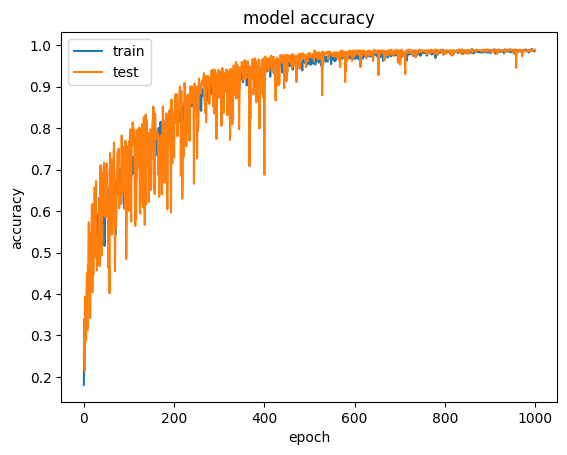

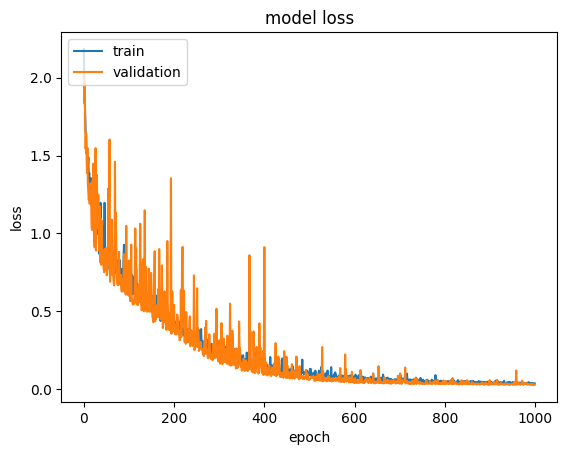

In [ ]:
num_patches = 5
patch_size = 3
embedding_dim = 32  #64
num_heads = 4
ff_dim = 128
num_classes = 10
input_shape = (7, 1)


def patchify(inputs, patch_size):
    patches = []
    for i in range(len(inputs) - patch_size + 1):
        patches.append(inputs[i : i + patch_size])
    return tf.convert_to_tensor(patches)


class PatchLayer(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        patches = tf.image.extract_patches(
            images=tf.expand_dims(inputs, axis=-1),
            sizes=[1, self.patch_size, 1, 1],
            strides=[1, 1, 1, 1],
            rates=[1, 1, 1, 1],
            padding="VALID"
        )
        return tf.reshape(patches, (batch_size, -1, self.patch_size))


class PatchEmbedding(layers.Layer):
    def __init__(self, num_patches, embedding_dim):
        super().__init__()
        self.projection = layers.Dense(embedding_dim,kernel_initializer=tf.keras.initializers.GlorotNormal())
        self.pos_embedding = layers.Embedding(input_dim=num_patches, output_dim=embedding_dim)

    def call(self, patches):
        batch_size = tf.shape(patches)[0]
        positions = tf.range(start=0, limit=num_patches, delta=1)
        return self.projection(patches) + self.pos_embedding(positions)

def transformer_encoder(inputs, num_heads, ff_dim):
    x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.Dense(ff_dim, activation="relu",kernel_initializer=tf.keras.initializers.GlorotNormal())(x)
    x = layers.Dense(inputs.shape[-1], kernel_initializer=tf.keras.initializers.GlorotNormal())(x)
    x = layers.Dropout(0.4)(x)
    return layers.Add()([inputs, x])


inputs = keras.Input(shape=input_shape)
x = PatchLayer(patch_size)(inputs)
x = PatchEmbedding(num_patches=num_patches, embedding_dim=embedding_dim)(x)


for _ in range(2):
    x = transformer_encoder(x, num_heads, ff_dim)


x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(num_classes, activation="softmax",kernel_initializer=tf.keras.initializers.GlorotNormal())(x)


model = keras.Model(inputs, outputs)


model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate= keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001,decay_steps=10000,decay_rate=0.5),
                                    beta_1=0.5),metrics=["accuracy"])

model.summary()
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
history = model.fit(xtrain, ytrain, batch_size=64,epochs=1000,
                    verbose=0, validation_data=(xvalid, yvalid))

acc = model.evaluate(xtrain, ytrain)
acc1  = model.evaluate(xvalid, yvalid)
print("Loss_train:", acc[0], " Accuracy_train:", acc[1])
print("Loss_valid:", acc1[0], "Accuracy_valid:", acc1[1])

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Testing *1D Vision Transfoermer*

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


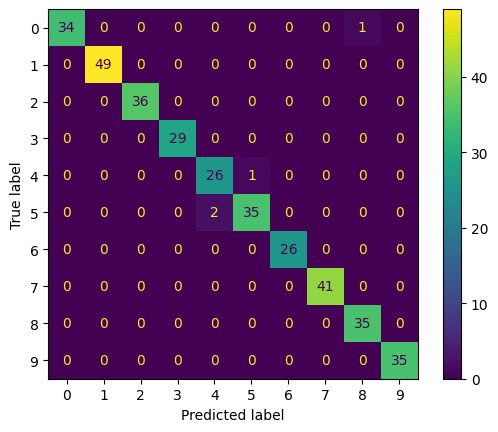

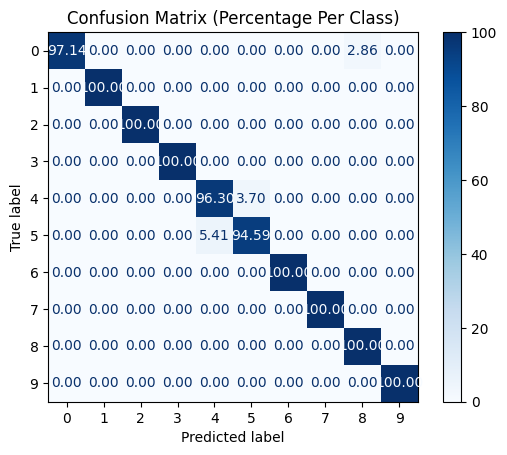

Accuracy Test:  98.85714285714286


In [ ]:
actual =ytest
y_pred_test= model.predict(xtest)
predicted = np.argmax(y_pred_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

acc_test=accuracy_score(ytest, predicted)
print("Accuracy Test: ", acc_test*100)

**CNN Model**

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 6, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6, 16)               │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 3, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,978 (7.73 KB)

 Trainable params: 1,850 (7.23 KB)

 Non-trainable params: 128 (512.00 B)

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9790 - loss: 0.0854
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9651 - loss: 0.1173 
Loss_train: 0.08567871898412704  Accuracy_train: 0.9805752635002136
Loss_validation 0.11435938626527786 Accuracy_validation 0.9619450569152832
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


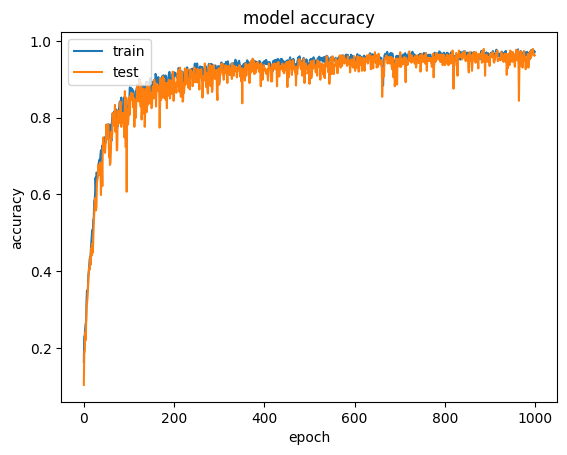

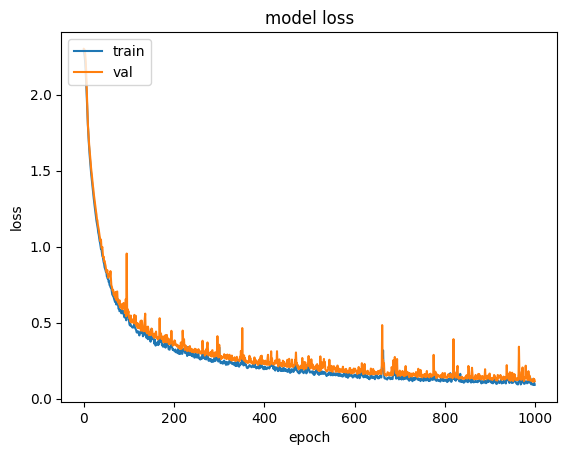

In [ ]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(7,1)))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy',
     optimizer =tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics = ['accuracy'])
model.summary()

history = model.fit(xtrain, ytrain, batch_size=256,epochs=1000,
                    verbose=0, validation_data=(xvalid, yvalid))

acc = model.evaluate(xtrain, ytrain)
acc1 = model.evaluate(xvalid, yvalid)
print("Loss_train:", acc[0], " Accuracy_train:", acc[1])
print("Loss_validation", acc1[0], "Accuracy_validation", acc1[1])

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


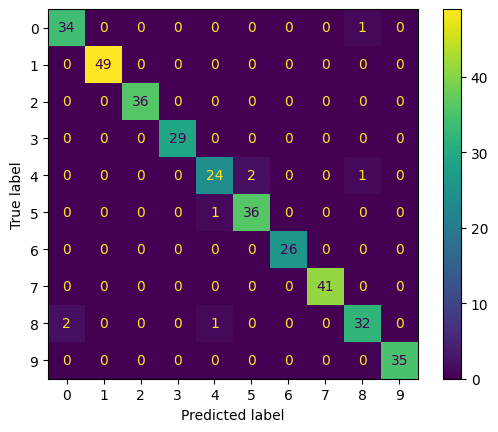

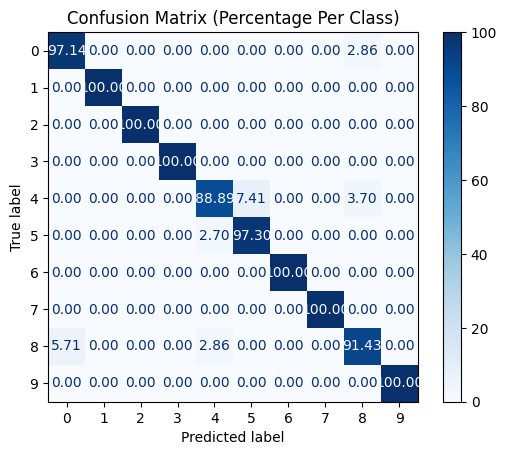

Accuracy Test:  97.71428571428571


In [ ]:
actual =ytest
y_pred_test= model.predict(xtest)
predicted = np.argmax(y_pred_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

acc_test=accuracy_score(ytest, predicted)
print("Accuracy Test: ", acc_test*100)

SVM Model

In [ ]:
model = SVC(kernel='linear' ,C=20, gamma='auto')
model.fit(xtrain,ytrain)

SVC(C=20, gamma='auto', kernel='linear')

In [ ]:
ypred_train = model.predict(xtrain)
svm_acc=accuracy_score(ytrain,ypred_train)*100
print("Accuracy Train:", svm_acc)

Accuracy Train: 90.5117669032499


In [ ]:
ypred = model.predict(xtest)
svm_acc=accuracy_score(ytest,ypred)*100
print("Accuracy Test:", svm_acc)

Accuracy Test: 89.14285714285714


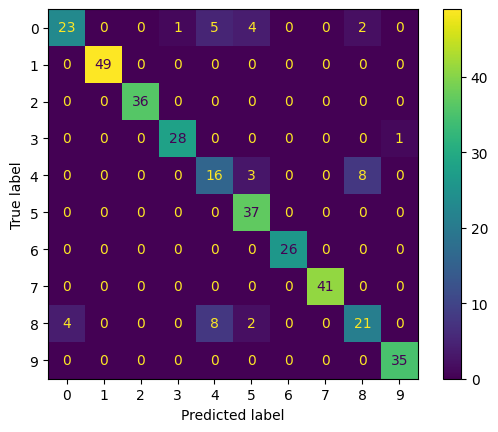

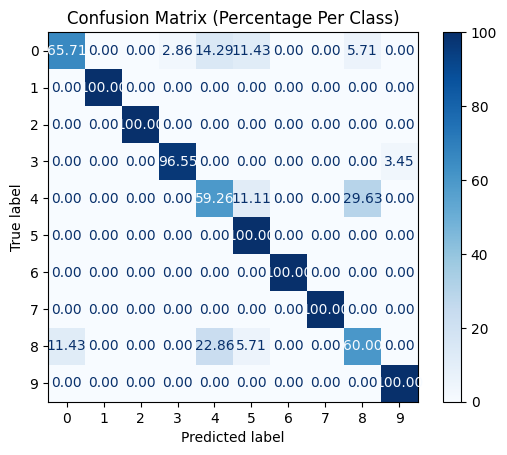

Accuracy Test:  89.14285714285714


In [ ]:
actual =ytest
y_pred_test= model.predict(xtest)
#predicted = np.argmax(y_pred_test)
confusion_matrix = metrics.confusion_matrix(actual, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

acc_test=accuracy_score(ytest, y_pred_test)
print("Accuracy Test: ", acc_test*100)

In [ ]:
predicted

14

RandomForest Model

KNN

In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=2)
model_knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
ypred_train = model_knn.predict(xtrain)
knn_acc=accuracy_score(ytrain,ypred_train)*100
print("Accuracy Train:", knn_acc)

Accuracy Train: 96.63802764288383


In [ ]:
ypred = model_knn.predict(xtest)
svm_acc=accuracy_score(ytest,ypred)*100
print("Accuracy Test:", knn_acc)

Accuracy Test: 96.63802764288383


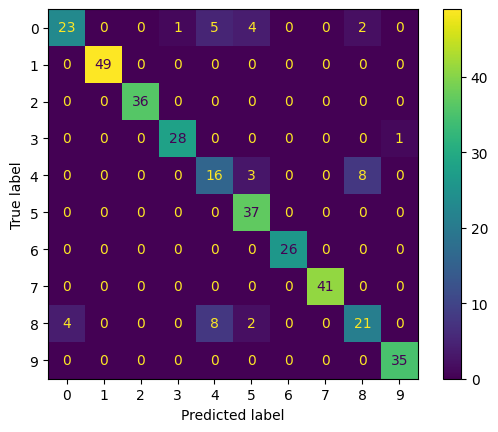

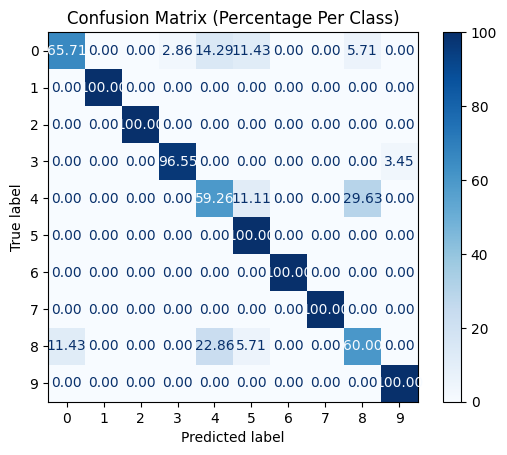

Accuracy Test:  89.14285714285714


In [ ]:
actual =ytest
y_pred_test= model.predict(xtest)
#predicted = np.argmax(y_pred_test)
confusion_matrix = metrics.confusion_matrix(actual, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

acc_test=accuracy_score(ytest, y_pred_test)
print("Accuracy Test: ", acc_test*100)